# AI-driven Urban Walking Route Planning and Personalized Recommendation: A Case Study of Paris

# 1 Introduction



Jane Jacobs' book *The Death and Life of Great American Cities* in 1961 is often seen as a founding work in advocating livable cities and walkable streets. Urban livability has now become an important factor in planning mordern cities; *Jane's Walk*, a walking-based activity to honor Jane Jacobs' advocacy, has become a global movement with over 500 cities involved over the world.

In fact, walkability is integral to urban lives no matter for inhabitants or visitors. Citywalk has recently emerged as a popular form of urban exploration, with abundant online travel reviews (OTRs) uncovering the uniqueness of visitor attractions (VAs) and aiding personalized selection. However, the overwhelming volume of OTRs poses a significant challenge for travelors to process them manually. This study employs the large language models (LLMs) to extract features of each VA from OTRs and match them with the users' natural language inputs for personalized citywalk route planning and recommendations.

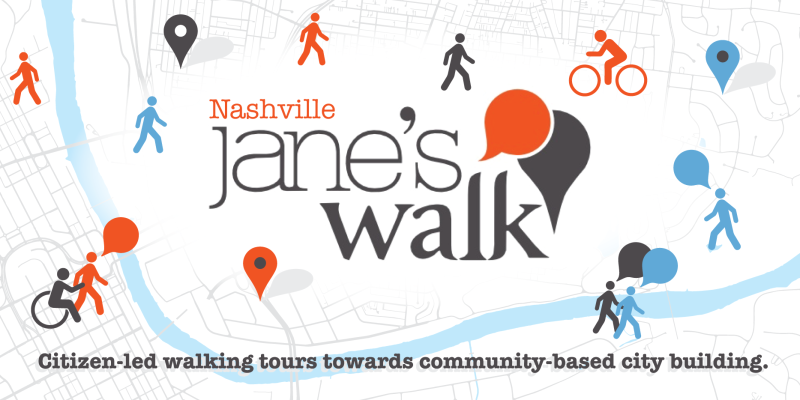


(image srouce: https://www.civicdesigncenter.org/all-events/janes-walk-2020)

# 2 Data and Preprocessing

## 2.1 User Queries Generation




According to Cohen, tourism can be viewed through five distinct modes: **Recreational Mode**, **Diversionary Mode**, **Experiential Mode**, **Experimental Mode**, and **Existential Mode**. Each mode represents different levels of engagement with the concept of "centre" and "centre-out-there." These modes reflect the range of experiences tourists may seek, from superficial entertainment to deeper quests for meaning and authenticity (Cohen, 1979).

Birgit Elands and Jaap Lengkeek further developed and empirically tested Cohen's five modes of tourist experience, providing a more nuanced understanding of these modes (Elands & Lengkeek, 2000). The detailed validity assessment of the 'Modes of Experience' scale items is listed as follows:

---
### Amusement
- **Fun**: "For me, having a nice time on vacation means drinking coffee or a beer with the neighbors."
  - "I like to go to places that attract many tourists and are nice and busy."
- **Centre-values**: "I like to eat Dutch food on vacation."
  - "I like to hear Dutch spoken when I’m on vacation."
- **Temporality**: "I like to go on vacation, but I also like it to go home again."

### Change
- **Escape**: "I go on vacation to get out of the daily grind."
  - "I have such a stressful job that I need to escape once in a while/because of the pressure of my daily activities, I have to go out once in a while."
- **Relaxation**: "The most important thing in my vacation is relaxation/I go on vacation for a good rest and relaxation."
  - "To me, vacation means being idle, sunbathing, and doing nothing."
- **Recover**: "I need vacation to recharge my batteries."
  - "I have to go on vacation at least once a year to recover."
  - "It takes me the first days of a vacation to unwind and forget about my job or housework."
- **Context matters**: "I don't care where I go on vacation, I just have to get away."

### Interest
- **Search for interesting vistas and stories**: "I always visit a church, castle, or historic city centre when I'm on vacation."
  - "On vacation, I don't feel like visiting a church, castle, or historic city centre (-)."
  - "I like to go to local cultural activities."
- **Stimulation of imagination**: "I always read the information boards at tourist sites."
  - "I always take a travel guide and a map of the area with me on vacation."
  - "When I'm on vacation, I go first to the local tourist office for specific information about the area."
- **Variation**: "On vacation I want to see new and various things all the time."
  - "I like to choose a different vacation destination each year."

### Rapture
- **Self-discovery**: "When I'm on vacation, I like to be alone in the great outdoors for hours on end."
  - "During my vacation I finally find time for myself."
- **Crossing borders**: "On vacation I like sporty challenges and surprises."
  - "I have no objections to primitive conditions when I'm on vacation."
  - "I like active vacations doing strenuous things such as long treks and cycle tours."
- **Unexpected**: "On vacation, I like it the most when, beforehand, I have no idea where I will go."
  - "On vacation, I like to be confronted with new experiences and surprises."

### Dedication
- **Quest for authenticity**: "Once an area starts getting touristy I don't go back."
  - "My first choice is exotic vacation destinations."
  - "On vacation, I search for wilderness and original landscapes where I won't meet anybody."
- **Merge**: "I am not satisfied with just seeing local cultures and their habits. I would rather be part of it."
  - "For me, vacation means totally immersing myself in other cultures."
  - "On vacation, I immerse myself totally in another culture."
- **Appropriation and devotion**: "I rather go to the same area because I feel bonded to it."
  - "The area where I always go on vacation, I really consider as my place."
  - "I visit ... (destination) because ... plays an important role in my life."
- **Timeless**: "I would like to live in ... / If I could I would like to live in my vacation place."


---

These items were developed to empirically measure the varying modes of experience a tourist might encounter during their journey, linking everyday activities with more profound, self-discovery, or existential pursuits.

Based on these modes of tourist experience and in conjunction with the history and culture of Paris, we prompted ChatGPT 4o to generate user queries and selected 51 user queries


## 2.2 Visitor Attractions(VAs) and Reviews

According to Leask, visitor attractions can be categorized into the following types: **theme parks/amusement**, **museums and galleries**, **natural**, **animal**, **visitor centres**, **religious sites**, and **heritage sites** (Leask, 2010). Based on these categories, a total of 981 VAs in Paris were retrieved from [Google Maps](https://www.google.com/maps),[Tripadvisor](https://www.tripadvisor.com/) and [OpenStreetMap](https://www.openstreetmap.org/).

Based on [Selenium](https://www.selenium.dev/), this study scraped Google Maps reviews for each VA, with reviews sorted by "most relevant". These reviews include detailed **user-generated content (UGC)** such as ratings and comments, providing valuable insights into tourist satisfaction, site-specific features, and overall experiences.

By combining the comprehensive VA dataset with detailed reviews, this study not only achieves a deeper understanding of tourist perceptions but also tries to mine the unique features of VAs.

# 3 Methods


![](https://drive.google.com/uc?export=view&id=1gBcNCYfpwZO8Mo7rMjbEPW42oqFuH3tZ)

## 3.1 VAs Database Construction

### 3.1.1 VA Features Extraction

According to Pearce's definition, an attraction is a "named site with a specific human or natural feature which is the focus of visitor and management attention" (Pearce, 1991). When visiting a destination, various attributes or features, often referred to as pull factors shape tourists' travel experiences (Ekiz and Khoo-Lattimore, 2014; Klenosky, 2002). These factors can be categorized into three main types: Physical Environment, Service Quality, and Core Experience (Faerber et al., 2021).

In the context of visitor attractions (VAs), the Core Experience is particularly significant as it directly attracts visitors and shapes their travel experiences. It includes elements such as content and presentation (Faerber et al., 2021), entertainment, fun, emotions, atmosphere (Geissler  Rucks, 2011), novelty (Poulsson and Kale, 2004), and authenticity (Pearce and Moscardo, 1986), all of which define the fundamental visitor experience. This study synthesizes these aspects into three key dimensions of the VA core experience: landscape and content, activities, and atmosphere.

Based on the Google Maps reviews collected for each VA, this study prompted **DeepSeek R1** to summarize the three-dimensional features of each VA:
$ f_{i}^{\text{lan}} (landscape \, and \, content) $, $ f_{i}^{\text{act}} (activities) $, $ f_{i}^{\text{atm}} (atmosphere) $.


In [ ]:
import pandas as pd
import numpy as np
import os
import json
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import csv
import requests
import pyproj
from tqdm import tqdm
import copy
import scipy
import networkx as nx
import datetime
import folium
from scipy.spatial.distance import cdist
import math
from geopy.distance import geodesic
from IPython.display import display


api_key = 'your_api_key'
gpt_client = OpenAI(api_key=api_key)

sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [ ]:
class VAFeaturesExtractor:

  def __init__(self, api_key):
    self.client = OpenAI(
    api_key = api_key,
    base_url = "https://ark.cn-beijing.volces.com/api/v3")
    self.sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

  def _process_va_decompostion_prompt(self,va_name, va_reviews):

    prompt = f"""
    You are an analysis assistant for Paris tourism.

    ### Task Overview
    Your task is to extract key characteristics of an attraction based on visitor reviews. Below are the reviews for {va_name}: {va_reviews}.
    Please analyze the reviews and break down the attraction into three main dimensions: landscape and content, suitable activities, and atmosphere.

    For each dimension:
    - Landscape and content: Describe the main visual and thematic aspects of the attraction.
    - Suitable activities: Identify the types of activities or experiences suitable for visitors.
    - Atmosphere: Summarize the general vibe or environment that visitors experience.

    Each dimension should not exceed 50 words and must be based solely on the reviews provided. Do not add any additional information outside the reviews.

    Return your response in the following JSON format:
    {{
        "landscape and content": "Extracted description of the landscape and content based on reviews.",
        "suitable activities": "Extracted description of suitable activities based on reviews.",
        "atmosphere": "Extracted description of the atmosphere based on reviews.",
    }}
    """
    return prompt

  def _process_va_decomposition(self,va_file_name):
      """
      Processes the VA decomposition for a given VA csv file.
      Reads the file, constructs a prompt, sends it to the model,
      and processes the model's response into JSON.

      Args:
      - va_file_name: The name of the VA file to process.

      Returns:
      - A dictionary containing the parsed VA decomposition if successful, otherwise None.
      """

      va_path = 'data/reviews/' + va_file_name
      va_info = pd.read_csv(va_path, encoding="utf-8")
      va_name = va_file_name.split('_')[0]
      va_reviews = va_info['caption']

      # Process the VA prompt
      prompt = self._process_va_decompostion_prompt(va_name, va_reviews)

      completion = self.client.chat.completions.create(
      model = "deepseek-r1-250120",
      messages = [
          {"role": "system", "content": "You are an AI travel analysis expert in Paris"},
          {"role": "user", "content": prompt},
          ],
      )
      response = completion.choices[0].message.content

      cleaned_response = response.strip("```json\n").strip("```")
      try:
        result = json.loads(cleaned_response)
        result['name'] = va_name
        return result
      except json.JSONDecodeError as e:
          # Handle JSON decoding error and print the error message
          print(f"Error decoding JSON: {e}")
          return None  # Return None if JSON parsing fails

  def extract_va_features(self):

    """
    Extracts the features of each VA by reading Google Maps reviews, processes them,
    and writes the summarized features into a CSV file.

    This method iterates over all review files, processes the VA data to extract
    features such as 'landscape and content', 'suitable activities', and 'atmosphere',
    and writes the results to a CSV file for further analysis.

    """

    files_list = os.listdir('data/reviews')
    output_file = 'data/VA_features.csv'
    fieldnames = ['name', 'landscape and content', 'suitable activities', 'atmosphere']

    if not os.path.exists(output_file):
        with open(output_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=fieldnames)
            writer.writeheader()

    for file_name in tqdm(files_list, total=len(files_list)):
        result = self._process_va_decomposition(file_name, self.client)
        if result is not None:
            with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.DictWriter(file, fieldnames=fieldnames)
                writer.writerow({
                    'name': result['name'],
                    'landscape and content': result['landscape and content'],
                    'suitable activities': result['suitable activities'],
                    'atmosphere': result['atmosphere'],
                })


In [ ]:
extractor = VAFeaturesExtractor(api_key)
extractor.extract_va_features()

### 3.1.2 VA Embeddings Generation

To construct the VA database, the extracted features $( f_{i}^{\text{lan}}$, $f_{i}^{\text{act}}$, $f_{i}^{\text{atm}})$ for each VA are processed into embeddings using an embedding model. These embeddings include $ e_{i}^{\text{lan}} $ for landscape and content, $ e_{i}^{\text{act}} $ for activities, $ e_{i}^{\text{atm}} $ for atmosphere. This transformation converts the textual features into structured numerical representations, allowing for efficient storage and analysis.

The resulting VA database integrates these embeddings for each VA, effectively capturing the unique characteristics of its landscape, content, activities, and atmosphere. This structured database serves as the foundation for generating personalized recommendations for tourists in Paris.

In [ ]:
def get_features_embeddings(embedding_model):
    """
    Computes and saves the embeddings for each feature of the VA dataset using the provided embedding model.

    This function reads the VA features from a CSV file, computes embeddings for the
    'landscape and content', 'suitable activities', and 'atmosphere' features of each
    VA using the provided embedding model, and stores the embeddings in a JSON file.

    Args:
    - embedding_model: A pre-trained model used to generate embeddings. It should have an `encode` method
      (e.g., SBERT or another embedding model).

    Returns:
    - None
    """
    va_embeddings = {}  # Initialize an empty dictionary to store embeddings for each VA
    keys = ["landscape and content", "suitable activities", "atmosphere"]
    VA_features = pd.read_csv('data/VA_features.csv', encoding='utf-8')

    # Iterate over each row in the VA features dataset to process each VA's features
    for index, row in VA_features.iterrows():
        va_name = row['name']
        embeddings = {}
        for key in keys:
            # Get the embedding for the current feature using the embedding model and store it in the dictionary
            embeddings[key] = embedding_model.encode(row[key]).tolist()
        va_embeddings[va_name] = embeddings

    # Save the embeddings to a JSON file
    with open('data/VA_features_embeddings.json', 'w') as f:
        json.dump(va_embeddings, f)

embedding_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# get_features_embeddings(embedding_model)

## 3.2 User Query Decomposition


To match VAs to a user request, this study prompts LLMs to analyze the request and decompose it into three dimensions corresponding to the VA features: $ r^{\text{lan}}  (\textit{expected landscape and content})$, $ r^{\text{act}}  (\textit{expected activities})$, and $ r^{\text{atm}} (\textit{expected atmosphere})$.

Subsequently, an embedding model is used to generate embeddings for the three dimensions of the user request, resulting in $ \phi^{\text{lan}}$, $\phi^{\text{act}}$, $\phi^{\text{atm}}$, which are then compared with the corresponding embeddings of each VA $( e_i^{\text{lan}}, e_i^{\text{act}}, e_i^{\text{atm}} )$.

By leveraging the LLM's decomposition of the user request and its inferences about the expected landscape and content, activities, and atmosphere, this approach provides richer context compared to directly matching the user request with the VA description. This enhances the adaptability and stability of the matching process.

The code details will be presented in section 3.3.1.

## 3.3 VAs Retrieval Based on User Queries

### 3.3.1 Direct VAs Retrieval Using Cosine Similarity

For each VA, a score is calculated by computing the cosine similarity between the request embeddings and the VA embeddings for each dimension. The overall score for a VA is determined as:

\begin{equation}
\text{Score}_i = w_{\text{lan}} \cdot \text{cosine}(\phi^{\text{lan}}, e_i^{\text{lan}}) + w_{\text{act}} \cdot \text{cosine}(\phi^{\text{act}}, e_i^{\text{act}}) + w_{\text{atm}} \cdot \text{cosine}(\phi^{\text{atm}}, e_i^{\text{atm}})
\end{equation}


**SearchEngine Class**

The `SearchEngine` class is designed to handle the retrieval and ranking of VAs based on user queries. It prompts the LLM to break down the user input, matches it to relevant attraction features, and computes cosine similarity to rank the attractions.The class mainly contains the following methods:

---

1. `__init__(self, gpt_client)`

This function initializes the `SearchEngine` class and requires a GPT client to be passed as input.

- **Parameters**:
  - `gpt_client`: The client object used to interact with the GPT model for processing user queries.

---

2. `get_cosine_similarity(self, user_input)`

This public method computes the cosine similarity between the user query and the VA features. The user query is first decomposed into three dimensions: **landscape and content**, **activities**, and **atmosphere**. Then, embeddings for these dimensions are generated and compared against precomputed embeddings of all attractions using cosine similarity. The results are sorted based on the computed similarity.

- **Parameters**:
  - `user_input`: The query from the user to be compared with the VA features.
  
- **Returns**:
  - A DataFrame containing the attractions, ranked by their cosine similarity to the user query.

---

In [ ]:
class SearchEngine:
  def __init__(self, gpt_client):
    self.sbert = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    self.client = gpt_client
    self.va_data = pd.read_csv('data/VA_features.csv',encoding='utf-8')

  def _process_input_prompt(self, user_input):
    prompt = f"""
    Hello,You are a Paris travel analysis expert now. Please help me decompose the user's query into multiple independent requirements based on the following categories: expected landscape and content, expected activities, expected atmosphere. You should return the results in the specified format without writing any code.

    ---

    ### Output Format:

    Return a list where each item is a dictionary representing an independent requirement, with the following key-value pairs:
    - **expected landscape and content**: Try to extract what kind of landscape or content the user want to visit.
    - **expected activities**: Try to extract the activities the user want to do.
    - **expected atomosphere**: Atomosphere usually could be described by quiet, romantic, cozy,majestic and so on.


    - Your return should be a list in the following format:
    [
        {{
            "expected landscape and content": "according to the user query, please figure out what kind of landscape and content the user want to visit. If there is any related people, please indicate",
            "expected activities": "according to the user query, please figure out the activities the user want to do. If there is any related people or activities, please indicate" ,
            "expected atmosphere": "according to the user query, please figure out the atmosphere the user want to feel",
        }},
        ...
    ]

    - Do not include any additional content in the output.

    ### User Input
    {user_input}

    ---

    ### Task Overview
    Your task is to analyze and break down the **user input** requirements into independent requirements and return them.
    - you should breakdown the user input into the following three dimensions: expected landscape and content, expected activities, and expected atmosphere.

    ---

    Now, based on the **user input**, return the results according to the **Task Overview** and **Output Format**.
    """

    return prompt

  def _process_response(self, response):
    """
    Extracts and processes the response to decode the JSON content.
    Strips unnecessary characters (triple backticks) and attempts to parse the JSON.

    Args:
    - response: The raw response object from the model API containing message content.

    Returns:
    - A dictionary if the JSON is valid, otherwise None.
    """

    raw_response = response.choices[0].message.content
    cleaned_response = raw_response.strip("```json\n").strip("```")

    # Try to parse the cleaned response as JSON
    try:
        return json.loads(cleaned_response)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return None

  def _user_query_decompostion(self, user_input):
    """
    Processes the user query for decomposition in the 'itenera' format.
    Sends the query to the model and returns the parsed JSON decomposition.

    Args:
    - user_query: The user input query for processing.
    - client: The client object used to communicate with the GPT model.

    Returns:
    - A dictionary containing the parsed query decomposition if successful, otherwise None.
    """
    # Process the user input prompt
    prompt = self._process_input_prompt(user_input)
    msgs = [{"role": "user", "content": prompt}]

    # Send the request to the model
    response = self.client.chat.completions.create(
        model="gpt-4o",
        messages=msgs
    )

    return self._process_response(response)

  def get_cosine_similarity(self, user_input):
    """
    Compute batch cosine similarity between user input query and all attraction embeddings.
    Supports both positive and negative similarity weighting.

    :param user_input: str, User's input query.
    :return: DataFrame, The original DataFrame with an added 'cosine_similarity' column.
    """
    va_data = self.va_data.copy()
    embedding_file = "/content/drive/MyDrive/experiment/data/final_attraction_features_embeddings.json"


    # Decompose user input into landscape and content,activities and atmosphere
    user_input_decomposition = self._user_query_decompostion(user_input)
    lc = user_input_decomposition[0]['expected landscape and content']
    ac = user_input_decomposition[0]['expected activities']
    at = user_input_decomposition[0]['expected atmosphere']

    # Get embeddings for the user input
    user_lc_embeddings = np.array(self.sbert.encode(lc)).reshape(1, -1)
    user_ac_embeddings = np.array(self.sbert.encode(ac)).reshape(1, -1)
    user_at_embeddings = np.array(self.sbert.encode(at)).reshape(1, -1)

    # Open the attraction embeddings file
    with open(embedding_file, 'r') as f:
        file_contents = f.read()
        all_va_features_embeddings = json.loads(file_contents)

        # Initialize lists to store the embeddings for all attractions
        lc_embeddings_list = []
        ac_embeddings_list = []
        at_embeddings_list = []
        attraction_names = []

        # Populate the lists with embeddings
        for va_name, va_features_embeddings in all_va_features_embeddings.items():
            lc_embeddings_list.append(np.array(va_features_embeddings['landscape and content']).reshape(1, -1))
            ac_embeddings_list.append(np.array(va_features_embeddings['suitable activities']).reshape(1, -1))
            at_embeddings_list.append(np.array(va_features_embeddings['atmosphere']).reshape(1, -1))
            attraction_names.append(va_name)

        # Convert lists into numpy arrays for batch processing
        lc_embeddings_matrix = np.vstack(lc_embeddings_list)
        ac_embeddings_matrix = np.vstack(ac_embeddings_list)
        at_embeddings_matrix = np.vstack(at_embeddings_list)

        # Compute cosine similarities for all attractions at once
        lc_similarity = cosine_similarity(lc_embeddings_matrix, user_lc_embeddings)
        ac_similarity = cosine_similarity(ac_embeddings_matrix, user_ac_embeddings)
        at_similarity = cosine_similarity(at_embeddings_matrix, user_at_embeddings)

        # Compute average similarity
        avg_similarity = 0.6 * lc_similarity.flatten() + 0.5 * ac_similarity.flatten() + 0.5 * at_similarity.flatten()

        # Add the similarity scores to the DataFrame
        va_data['cosine_similarity'] = avg_similarity
        va_df_sorted = va_data.sort_values(by='cosine_similarity', ascending=False).reset_index(drop=True)

    return va_df_sorted

### 3.3.2 VAs Retrieval Using Retrieval-Augmented Generation (RAG)

In many cases, relying solely on cosine similarity to rank attractions can lead to inaccurate recommendations. To improve the accuracy of the results, this study also explores the use of the Retrieval-Augmented Generation (RAG) method to enhance the attraction recommendations. After ranking the attractions based on cosine similarity, the top fifty VAs with the highest scores are selected. Features previously extracted from Google Maps reviews are provided as augmented information, allowing the LLM to combine the characteristics of each attraction with the user’s requirements to make more accurate recommendations.

In section 3.3.2, spatial optimization of the itinerary generated by the LLM will not be performed. Instead, the LLM-generated itinerary of VAs will be used directly as the output. This approach focuses on testing the LLM's ability to generate a coherent sequence of VAs without the need for spatial optimization.

**LLMPlanner Class**

The `LLMPlanner` class is designed to generate an itinerary based on user input using LLMs. It integrates the `SearchEngine` class to retrieve the top-k candidate attractions and then determines the final recommended VAs based on their detailed features.

---
1. `__init__(self, user_input, api_key)`initializes the `LLMPlanner` class. It accepts the user input and API key, sets up the GPT client, and computes the cosine similarity scores to find the most relevant attractions.
---
2. `route_planner(self)` plans the route based on the itinerary and visualizes it on a map using the `folium` library. It places markers for each attraction and draws a polyline to represent the route. It also calculates the total straight-line distance for the entire itinerary.
- **Returns**:
  - `map` (folium.Map): A Folium map object displaying the itinerary with markers and a polyline for the route.
  - `distance` (float): The total straight-line distance (in kilometers) between the attractions.
  - `itinerary` (str): The raw generated itinerary returned from the LLM.
  - `attraction_details` (DataFrame): A DataFrame containing the details (name, coordinates) of the selected attractions.
  ---

In [ ]:
class LLMPlanner:
  def __init__(self,user_input,api_key):
    self.client = OpenAI(api_key=api_key)
    self.search_engine = SearchEngine(self.client)
    self.user_input = user_input
    while True:
      try:
        self.data = self.search_engine.get_cosine_similarity(self.user_input)
        break
      except:
        pass
    self.client_ds = OpenAI(
    api_key = "your_volcano_engine_key",
    base_url = "https://ark.cn-beijing.volces.com/api/v3",)

  def get_prompt_without_coordinates(self):

    top_50_candidates = self.data.head(50)
    top_50_attractions_list = []

    for index, row in top_50_candidates.iterrows():
        va = {}
        va['id'] = row['id']
        va['name'] = row['name']
        va['landscape and content'] = row['landscape and content']
        va['suitable activities'] = row['suitable activities']
        va['atmosphere'] = row['atmosphere']
        top_50_attractions_list.append(va)

    prompt = f"""
        You are an AI travel planning expert in Paris. Select 10 optimal attractions from the candidate list that meet both content relevance and geographical clustering requirements.

    ### Core Objectives
    Strictly choose 10 attractions from 50 candidates ensuring:
    1. Content Relevance: Match user's theme and exclude conflicting negative features
    2. Spatial Cohesion: Maintain reasonable distances between attractions
    3. Experience Diversity: Balance different types of experiences

    ### Input Data
    【User Requirements】
    {self.user_input}

    【Candidate Attractions】(Format: name, positives, negatives)
    {top_50_attractions_list}

    ### Processing Pipeline
    Three-stage strict filtering:

    Stage 1: Primary Selection
    1.


    Stage 2: Geographical Analysis
    1. Distance Validation: Eliminate outliers exceeding reasonable distances
    2. Route Optimization: Ensure logical visitation sequence with minimal backtracking

    Stage 3: Final Verification
    1. Cluster Check: Confirm geographical grouping consistency
    2. Experience Balance: Validate diversity of attraction types

    ### Output Specifications
    Only return the attraction IDs, not any other information.
    Strictly return only the attraction IDs in the following format:
    {{id of AttractionA, id of AttractionB, id of AttractionC, ..., id of AttractionJ}}


    Prohibited Elements:
    1. No explanations or comments
    2. No numbering or special symbols
    3. No Markdown formatting
    4. No coordinate data
    """

    return prompt

  def get_prompt_with_coordinates(self):

    top_50_attractions_list_with_coordinates = []
    top_50_attractions = self.data.head(50)
    for index, row in top_50_attractions.iterrows():
        va = {}
        va['id'] = row['id']
        va['name'] = row['name']
        va['landscape and content'] = row['landscape and content']
        va['suitable activities'] = row['suitable activities']
        va['atmosphere'] = row['atmosphere']
        va['latitude'] = row['latitude']
        va['longitude'] = row['longitude']
        top_50_attractions_list_with_coordinates.append(va)

    prompt = f"""
        You are an AI travel planning expert in Paris. Select 10 optimal attractions from the candidate list that meet both content relevance and geographical clustering requirements.

    ### Core Objectives
    Strictly choose 10 attractions from 50 candidates ensuring:
    1. Content Relevance: Match user's theme and exclude conflicting negative features
    2. Spatial Cohesion: Maintain reasonable distances between attractions
    3. Experience Diversity: Balance different types of experiences

    ### Input Data
    【User Requirements】
    {self.user_input}

    【Candidate Attractions】(Format: name, positives, negatives, latitude, longitude)
    {top_50_attractions_list_with_coordinates}


    ### Processing Pipeline
    Three-stage strict filtering:

    Stage 1: Primary Selection
    1. Relevance Scoring: Prioritize attractions matching user requirements
    2. Negative Filtering: Exclude attractions with conflicting negatives

    Stage 2: Geographical Analysis
    1. Distance Validation: Eliminate outliers exceeding reasonable distances. Each attraction has a coordinate (latitude and longitude). You could make a judgement based on the distance between attractions.
    2. Route Optimization: Ensure logical visitation sequence with minimal backtracking

    Stage 3: Final Verification
    1. Cluster Check: Confirm geographical grouping consistency
    2. Experience Balance: Validate diversity of attraction types

    ### Output Specifications
    Only return the attraction IDs, not any other information.
    Strictly return only the attraction IDs in the following format:
    {{id of AttractionA, id of AttractionB, id of AttractionC, ..., id of AttractionJ}}

    Prohibited Elements:
    1. No explanations or comments
    2. No numbering or special symbols
    3. No Markdown formatting
    4. No coordinate data
    """

    return prompt

  def get_itinerary(self):
    """
    Retrieves the itinerary for the user based on the prompt provided.

    This function sends a request to the DeepSeek model to generate a travel itinerary. The model
    is prompted without any geographical coordinates to generate the sequence of attractions for
    the user. The generated itinerary is returned as a string.

    Returns:
        str: A string representing the generated itinerary, which includes the ordered list of attractions.
    """

    prompt = self.get_prompt_without_coordinates()
    completion = self.client_ds.chat.completions.create(
    model = "deepseek-r1-250120",
    messages = [
        {"role": "system", "content": "You are an AI travel planning expert in Paris"},
        {"role": "user", "content": prompt},
        ],
    )
    itinerary = completion.choices[0].message.content
    return itinerary


  def calculate_straightline_distance(self, attraction_coordinates):
    """
    Calculates the total straight-line distance (in kilometers) between consecutive attractions.

    This function iterates through the list of coordinates, computing the geodesic (shortest path over the earth's surface)
    distance between each pair of consecutive attractions using the geopy library.

    Args:
        attraction_coordinates (list): A list of tuples or lists containing the latitude and longitude of each attraction.

    Returns:
        float: The total straight-line distance in meters between all consecutive attractions.
    """
    total_distance = 0
        # Extract list of coordinates from the dictionary and compute the distance between each pair of consecutive attractions
    previous_coordinates = None

    for coordinates in attraction_coordinates:
        if previous_coordinates:
                # Use geodesic from geopy to calculate distance between two points
            total_distance += geodesic(previous_coordinates, coordinates).kilometers*1000
        previous_coordinates = coordinates

    return total_distance

  def route_planner(self):
    """
    Plans and visualizes the route based on the generated itinerary and attraction details.

    This function first retrieves the itinerary generated by the LLM, extracts the list of attraction IDs,
    and fetches the corresponding attraction details (latitude and longitude). It then uses Folium to plot the attractions
    on a map and draws a polyline to represent the planned route. Additionally, it calculates the total straight-line
    distance between the attractions.

    Returns:
        tuple: A tuple containing:
            - map (folium.Map): A Folium map with markers for the attractions and a polyline for the route.
            - distance (float): The total straight-line distance (in kilometers) between the attractions.
            - itinerary (str): The raw generated itinerary returned from the LLM.
            - attraction_details (DataFrame): A DataFrame containing the details (name, coordinates) of the attractions.
    """
    itinerary = self.get_itinerary()
    splited_itinerary = [item.strip() for item in itinerary.replace('{', '').replace('}', '').split(',')]
    splited_itinerary = [int(item) for item in splited_itinerary if item.isdigit()]
    attraction_details = self.data[self.data['id'].isin(splited_itinerary)]
    start_location = [attraction_details.iloc[0]['latitude'], attraction_details.iloc[0]['longitude']]
    map = folium.Map(location=start_location, zoom_start=14)

    locations = []

    for _, row in attraction_details.iterrows():
        lat, lon, name = row["latitude"], row["longitude"], row["name"]
        locations.append([lat, lon])

        folium.Marker(
            location=[lat, lon], popup=name, tooltip=name
        ).add_to(map)


    folium.PolyLine(locations, color='blue', weight=3, opacity=0.8).add_to(map)

    distance = self.calculate_straightline_distance(locations)

    display(map)

    #return map, distance,itinerary, attraction_details



## 3.4 Spatial Optimazition

When generating itineraries, it is crucial to ensure that the selected VAs are not too geographically dispersed, as this can negatively affect the overall experience for tourists. Ensuring that the attractions in an itinerary are spatially clustered can have a significant impact on the overall flow of the journey.



### 3.4.1 Spatial Clustering

After computing the matching scores for the VAs, a spatial clustering algorithm is applied to ensure that the selected VAs exhibit spatial clustering. The process works as follows:

**Clustering Process**:

1. **Initial Selection**:
   - Starting with the  $ Top(N) $ VAs with the highest matching scores, the algorithm evaluates the spatial relationships by calculating the straight line distances between the VAs.

2. **Cluster Formation**:
   - If the distance between two VAs is less than a threshold $(\tau)$, they are connected and form a cluster.

3. **Valid Cluster Requirement**:
   - A valid cluster must contain at least three attractions. Clusters with fewer than three attractions are considered invalid.

**Cluster Refinement:**

1. If the number of VAs in the valid clusters formed by the initial $ Top(N) $ VAs does not meet the minimum required number of attractions, the algorithm will add new VAs from the remaining pool and recalculate the clusters.
2. This process continues until the VAs in valid clusters meet the minimum required number of attractions for an itinerary.

### 3.4.2 VAs Ordering

After obtaining the candidate VAs list, a simulated annealing algorithm is employed to determine the visiting order of the VAs, ensuring the coherence of the itinerary.

**SpatialHandler Class**

The `SpatialHandler` class is designed to handle the selection and optimization of VAs based on spatial clustering and the Traveling Salesman Problem (TSP) solution using Simulated Annealing. This class ensures that the VAs are spatially clustered as much as possible and maintains the coherence of the itinerary. The class mainly includes the following functions:

---

 1. `__init__(self, data, min_clusters_vas, min_vas, citywalk_thresh=1000)`
 initializes the `SpatialHandler` class, setting the necessary parameters for VA selection and spatial clustering.
- **Parameters**:
  - `data`: A sorted Dataframe data by cosine similarities which is calculated by the `SearchEngine.get_cosine_similarity(user_input)` method.
  - `min_clusters_vas`: The minimum number of VAs required for a valid cluster.
  - `min_vas`: The minimum number of VAs required for the itinerary.
  - `citywalk_thresh`: The distance threshold for clustering POIs (default is 1000 meters).
  
---

2. `get_clusters(self, va_data, thresh: int = 1000) -> list`
identifies clusters of points within a given distance threshold in a set of VAs. It calculates the spatial relationships using a distance matrix and creates a graph to find clusters.
- **Parameters**:
  - `va_data`: The DataFrame containing the VA data to be clustered.
  - `thresh`: The distance threshold defining cluster membership (default is 1000 meters).
- **Returns**:
  - A list of clusters, where each cluster is represented by a set of point identifiers.

---

3. `get_candidates(self)` implements modified spatial clustering for VA selection. It first clusters the top \(N\) POIs and checks if each cluster has at least three POIs within the specified distance threshold. If the selected clusters do not meet the minimum number of VAs (`min_vas`), it adds additional VAs from the remaining pool and recalculates the clusters.
- **Parameters**:
  - None (uses the class attributes `min_vas`, `min_clusters_vas`, `citywalk_thresh`).
- **Returns**:
  - A DataFrame containing the selected candidate POIs sorted by cosine similarity.

---

4. `solve_tsp(self, candidates, initial_temp=5000, cooling_rate=0.99, Tmin=1e-13)` solves the Traveling Salesman Problem (TSP) using the Simulated Annealing algorithm to optimize the route for the selected VAs. This method minimizes the total distance between attractions, ensuring that the itinerary is spatially efficient.
- **Parameters**:
  - `candidates`: A DataFrame containing columns `id`, `name`, `cosine similarity score`, `x`, and `y` (spatial coordinates).
  - `initial_temp`: The initial temperature for the Simulated Annealing process (default is 5000).
  - `cooling_rate`: The rate at which the temperature decreases during the annealing process (default is 0.99).
  - `Tmin`: The minimum temperature at which the algorithm will stop (default is $(1 \times 10^{-13})$).
- **Returns**:
  - `ordered_candidates`: A DataFrame containing the ordered candidates (attractions) based on the optimized route.
  - `best_distance`: The total distance of the optimized route.

---



In [ ]:
class SpatialHandler:
  def __init__(self, data, min_clusters_vas, min_vas, citywalk_thresh=500):
      self.data = data
      self.min_vas = min_vas
      self.min_clusters_vas = min_clusters_vas
      self.citywalk_thresh = citywalk_thresh

  def get_clusters(self, va_data, thresh: int = 1000) -> list:
      """
      Identify clusters of points within a given distance threshold in a set of points.

      Args:
          thresh (int, optional): The distance threshold defining cluster membership. Defaults to 5000.

      Returns:
          list: A list of clusters, where each cluster is represented as a set of point identifiers.
      """
      coords = va_data[['x', 'y']].astype(float).to_numpy()

      dist_matrix = scipy.spatial.distance.cdist(coords, coords)
      np.fill_diagonal(dist_matrix, thresh + 100)
      N = len(coords)
      G = nx.Graph()
      for i in range(N):
          G.add_edge(i, i)
          for j in range(i+1, N):  # avoid duplicates and self-loops
              if dist_matrix[i, j] < thresh:
                  G.add_edge(i, j)

      all_clusters = []

      if G.number_of_edges() == 0:
          all_clusters = [[i for i in va_data.index]]
          return all_clusters

      while G.number_of_nodes() > 0:
          cliques = list(nx.find_cliques(G))
          index_of_longest = max(enumerate(cliques), key=lambda x: len(x[1]))[0]
          biggest_cluster_list = list(set(cliques[index_of_longest]))
          G.remove_nodes_from(biggest_cluster_list)
          all_clusters.append(set(va_data.index[biggest_cluster_list].tolist()))

      return all_clusters

  def get_candidates(self):
      """
      Implements modified Spatial Clustering for VA Selection:
      1. Cluster the top 10 POIs. If a cluster has ≥3 POIs within citywalk_thresh, select it.
      2. If selected clusters don't meet min_pois, add top POIs from the remaining list.

      Args:
          self.data (pd.DataFrame): DataFrame containing 'id', 'name', 'cosine similarity score', 'x', 'y'
          self.min_vas (int): Number of candidate VAs to select.
          self.citywalk_thresh (float): Maximum allowed distance for clustering.

      Returns:
          pd.DataFrame: Selected candidate POIs sorted by cosine similarity.
      """


      initial_count = self.min_vas
      initial_data = self.data.iloc[:initial_count].copy()

      current_cluster = self.get_clusters(initial_data, self.citywalk_thresh)
      candidates = pd.DataFrame(columns=self.data.columns)


      while True:
          valid_va_count = 0
          for cluster in current_cluster:
              if len(cluster) >= self.min_clusters_vas:
                valid_va_count += len(cluster)

          if valid_va_count >= self.min_vas:
              break

          initial_count += 1
          initial_data = self.data.iloc[:initial_count].copy()
          current_cluster = self.get_clusters(initial_data, self.citywalk_thresh)



      for cluster in current_cluster:
          if len(cluster) >= self.min_clusters_vas:
              candidates = pd.concat([candidates, self.data.loc[list(cluster)]])


      return candidates


  def solve_tsp(self, candidates, initial_temp=5000, cooling_rate=0.99, Tmin = 1e-13):
      """
      Solves the Traveling Salesman Problem (TSP) using the Simulated Annealing algorithm.

      Parameters:
      candidates: A DataFrame containing columns: id, name, cosine similarity score, y, and x.
      initial_temp: float, Initial temperature.
      cooling_rate: float, Cooling rate for annealing.
      Tmin: float, Minimum temperature to stop the iterations.

      Returns:
      ordered_candidates: pandas.DataFrame, The optimized route DataFrame.
      """

      locations = list(zip(candidates["x"], candidates["y"]))
      num_pois = len(locations)

      # Compute distance matrix
      dist_matrix = cdist(locations, locations, metric='euclidean')

      # Initialize with a random route
      current_solution = np.arange(num_pois)
      np.random.shuffle(current_solution)

      def total_distance(route):
          return sum(dist_matrix[route[i], route[i + 1]] for i in range(num_pois - 1))

      current_distance = total_distance(current_solution)
      best_solution = np.copy(current_solution)
      best_distance = current_distance

      temp = initial_temp

      while temp > Tmin:
          # Randomly swap two points
          i, j = np.random.randint(0, num_pois, size=2)
          new_solution = np.copy(current_solution)
          new_solution[i], new_solution[j] = new_solution[j], new_solution[i]

          new_distance = total_distance(new_solution)

          # Accept new solution based on energy difference and probability
          if new_distance < current_distance or np.exp((current_distance - new_distance) / temp) > np.random.rand():
              current_solution, current_distance = new_solution, new_distance

              if new_distance < best_distance:
                  best_solution, best_distance = new_solution, new_distance

          temp *= cooling_rate  # Gradually reduce temperature

      # Return the optimized DataFrame with the best route order
      ordered_candidates = candidates.iloc[best_solution].reset_index(drop=True)
      return ordered_candidates, best_distance


**DimensionsPlanner Class**

The `DimensionsPlanner` class is designed to generate an optimized itinerary based on user input. By integrating the `SearchEngine` and `SpatialHandler` classes, it ensures that the itinerary is spatially coherent and meets the user’s preferences. The class takes user input, computes similarity scores, apply spatial optimazition algorithm to create and visulise a recommended route. The class mainly contains the following methods:

---
1. `__init__(self, user_input)`initializes the `DimensionsPlanner` class by taking user input.
- **Parameters**:
  - `user_input`: The input provided by the user, which is used to determine the attractions and their order.
---

2. `route_planner(self)` generates a map showing the route based on the ordered attractions. It uses the `folium` library to visualize the itinerary, with markers representing the attractions and a polyline showing the route.

---


In [ ]:
class DimensionsPlanner:
  def __init__(self, user_input):
    """
    Initializes the DimensionsPlanner class with the user's input and computes the ordered list
    of attractions based on cosine similarity and spatial clustering.

    Args:
       - user_input (str): The input provided by the user, specifying their preferences for attractions.
    """
    self.user_input = user_input
    self.ordered_candidates, self.distance= self._get_ordered_candidates(user_input)


  def _get_ordered_candidates(self,user_input):
    """
    This method integrates the SearchEngine and SpatialHandler classes to generate ordered candidates
    for the itinerary. It calculates cosine similarity between the user input and attractions, applies
    spatial clustering, and then solves the Traveling Salesman Problem (TSP) to order the attractions
    based on the shortest route.

    Args:
    - user_input (str): The user's preferences that are used to filter and sort the attractions.

    Returns:
    - ordered_candidates (pd.DataFrame): The ordered list of selected attractions based on user preferences.
    - distance (float): The total distance of the optimized route.
    """
    api_key = 'your_openai_key'
    gpt_client = OpenAI(api_key=api_key)
    searchengine = SearchEngine(gpt_client)
    similarities = searchengine.get_cosine_similarity(user_input)
    spatialhandler = SpatialHandler(similarities,3, 10,1000)
    candidates = spatialhandler.get_candidates()
    ordered_candidates, distance = spatialhandler.solve_tsp(candidates)

    return ordered_candidates, distance


  def route_planner(self):
    """
    This method generates the final itinerary and displays the route on a map using Folium.
    It places markers for each attraction and connects them with a polyline representing the route.
    The map is displayed for the user.

    Returns:
    - map (folium.Map): A map displaying the itinerary with markers and route polyline.
    """

    if self.ordered_candidates.empty:
      print("No candidates found.")
      return None

    start_location = [self.ordered_candidates.iloc[0]['latitude'], self.ordered_candidates.iloc[0]['longitude']]
    map = folium.Map(location=start_location, zoom_start=14)
    locations = []

    for _, row in self.ordered_candidates.iterrows():
      lat, lon, name = row["latitude"], row["longitude"], row["name"]
      locations.append([lat, lon])

      folium.Marker(
          location=[lat, lon], popup=name, tooltip=name
      ).add_to(map)


    folium.PolyLine(locations, color='blue', weight=3, opacity=0.8).add_to(map)
    display(map)

# 4 Experiments

## 4.1 Evaluation Metrics

The evaluation metrics mainly use two indicators: **Hit Rate (HR)** and **Average Margin (AM)**.

1.   **Hit Rate (HR)**: This metric evaluates whether the recommended VAs meet the user’s requirements. It is calculated by providing the VA information, extracted from Google Maps reviews, along with the user query to the LLM. The LLM then determines whether each VA aligns with the user's needs. After obtaining the LLM’s judgments, manual verification is conducted to ensure the accuracy of the results.
2.   **Average Margin (AM)**: This metric measures the average difference per VA between the total distance of the generated itinerary and the shortest distance. It evaluates how efficiently the itinerary is planned in terms of distance.








**Judger Class**

The `Judger` class is designed to evaluate the recommended VAs based on user requirements. It utilizes a LLM to perform binary evaluations (Conforming/Not Conforming) for each recommended attraction according to the features extracted from Google Map reviews of each VA. This class mainly contains the following methods:

---
1. `__init__(self, candidates, user_input)`initializes the `Judger` class by accepting a list of candidate attractions and the user’s input. It also sets up the OpenAI client for communication with the GPT model.
- **Parameters**:
  - `candidates` (pd.DataFrame): A DataFrame containing the candidate attractions to be evaluated.
  - `user_input` (str): The user’s preferences or requirements that will be used to evaluate the attractions.
---

2. `get_judgement_result(self)` sends the evaluation prompt (generated by `get_judgement_prompt`) to the GPT 4o model and processes the response. It returns the result of the evaluation, including the counts of attractions that are "Conforming" and "Not Conforming".
- **Returns**:
  - `result` (list): A list of dictionaries containing the evaluated attractions, their conformity status ("Conforming" or "Not Conforming"), and justifications.
  - `conforming_count` (int): The number of attractions that conform to the user’s requirements.
  - `not_conforming_count` (int): The number of attractions that do not conform to the user’s requirements.
  ---

In [ ]:
class Judger:
  def __init__(self, candidates, user_input):
    self.candidates = candidates
    self.user_input = user_input
    api_key = 'your_openai_key'
    self.client = OpenAI(api_key=api_key)

  def _process_response(self, response):
    """
    Extracts and processes the response to decode the JSON content.
    Strips unnecessary characters (triple backticks) and attempts to parse the JSON.

    Args:
    - response: The raw response object from the model API containing message content.

    Returns:
    - A dictionary if the JSON is valid, otherwise None.
    """
    raw_response = response.choices[0].message.content

    cleaned_response = raw_response.strip("```json\n").strip("```")

    try:
        return json.loads(cleaned_response)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return None

  def get_judgement_prompt(self):

    candidates_list = []
    for index, row in self.candidates.iterrows():
        va = {}
        va['name'] = row['name']
        va['landscape and content'] = row['suitable activities']
        va['suitable activities'] = row['suitable activities']
        va['atmosphere'] = row['atmosphere']
        candidates_list.append(va)

    prompt = f"""
      As a Paris travel itinerary evaluation expert, conduct rigorous assessment of recommended attractions based on user requirements. Follow this framework:

      ### Core Task
      Perform binary evaluation (Conforming/Not Conforming) for each recommended attraction with factual justification.

      ### Input Specifications
      You will receive:
      1. User Query: Description of interests/requirements
      2. Recommended Attractions: List with names and descriptions.
      [{{
          'name': 'Attraction Name',
          'Landscape and content': 'Describe the main visual and thematic aspects of the attraction.'
          'Suitable activities': 'Describe types of activities or experiences suitable for visitors.'
          'Atmosphere': Describe the general vibe or environment that visitors experience.'
      }},
      ...
      ]

      ### Evaluation Criteria
      1. Thematic Relevance: Focus on direct correlation between attraction's core theme and user needs
      2. Exclusion of Non-relevant Factors: Ignore distance, pricing, opening hours unless explicitly specified
      3. Factual Accuracy: Combine official descriptions with industry knowledge

      ### Output Specifications
      Return JSON list strictly following this structure:
      [
        {{
          "name": "Attraction Name",
          "judgement": "Conforming" or "Not Conforming",
          "reason": "Specific justification referencing core characteristics"
        }},
        ...
      ]

      ### Benchmark Examples
      User Query: "I'm interested in fashion design history. What places do you recommend?"

      Correct Output:
      [
        {{
          "name": "Palais Galliera",
          "judgement": "Conforming",
          "reason": "Paris Fashion Museum showcasing garment evolution from 18th century to present, with permanent collection of 200,000+ fashion items and rotating exhibitions featuring Dior, Chanel, etc."
        }},
        {{
          "name": "Louvre Museum",
          "judgement": "Not Conforming",
          "reason": "While being an art treasury, its core collections focus on classical paintings/sculptures. Fashion-related content constitutes less than 0.5% of total exhibits with no systematic fashion history presentation."
        }}
      ]

      ### Current Task
      User Requirements: {self.user_input}

      Attractions to Evaluate:
      {candidates_list}

      ### Critical Requirements
      1. Item-by-item analysis: Evaluate each attraction independently
      2. Evidence-based: Base judgements solely on provided data and verified facts
      3. Professional Terminology: Use precise terms like "haute couture heritage" instead of generic descriptions
      4. Contrastive Reasoning: Explicitly compare attraction's core function with user needs in justifications
      """
    return prompt


  def get_judgement_result(self):

    prompt = self.get_judgement_prompt()
    msgs = [{"role": "user", "content": prompt}]
    response = self.client.chat.completions.create(
        model="gpt-4o",
        messages=msgs
    )

    result = self._process_response(response)
    not_conforming_count = sum(1 for item in result if item.get("judgement") == "Not Conforming")
    conforming_count = sum(1 for item in result if item.get("judgement") == "Conforming")


    return result, conforming_count, not_conforming_count


In [ ]:
def evaluate(user_queries_path, output_path):
    user_queries = pd.read_csv(user_queries_path)
    results = []

    for index, user_query in tqdm(user_queries.iterrows(), total=user_queries.shape[0]):
        while True:
            try:
                llmplanner = LLMPlanner(user_query['query'])
                map,distance,itinerary,attraction_details = llmplanner.route_planner()
                break
            except Exception as e:
                print(f"Error in get result: {e}")

        try:
            judger = Judger(attraction_details, user_query['query'])
            result, conforming_count, not_conforming_count = judger.get_judgement_result()
            straight_line_distance = distance
            query_result = {
                'user_query': user_query['query'],
                'result': result,
                'conforming_count': conforming_count,
                'not_conforming_count': not_conforming_count,
                'straight_line_distance': straight_line_distance
            }
            results.append(query_result)
        except Exception as e:
            print(f"Error in fetching the result of {user_query['query']}: {e}")


    results_df = pd.DataFrame(results)
    results_df.to_csv(output_path, index=False)

# Call the function
#evaluate('data/user_queries.csv', 'results/rag_results.csv')


## 4.2 Experiments Results

This study also replicated the **Itinera**(Tang et al., 2024) method and compared it with the method that decomposes the user query and attractions into three dimensions. The experimental results are summarized in the table below:

| Method                 | Hit Rate (%) | Average Margin (meters) |
|------------------------|--------------|-------------------------|
| Features Decomposition  | 66.4         | 658.9                   |
| Itinera                 | 59.0         | 651.4                   |
| RAG Method              | 80.2         | 20168.3                 |


- The **RAG method** outperformed both the **Features Decomposition** and **Itinera** methods in terms of **Hit Rate**, achieving the highest value of 80.2%. However, it exhibited a significantly higher **Average Margin** (20168.3 meters), indicating that while it produced highly relevant recommendations, the spatial coherence of the itinerary may require further optimization.
- The **Features Decomposition** method achieved a **Hit Rate** of 66.4%, providing a balanced performance with an **Average Margin** of 658.9 meters, suggesting relatively high accuracy and spatial coherence in the recommendations.
- The **Itinera** method had the lowest **Hit Rate** (59.0%) and **Average Margin** (651.4 meters), indicating that although the method ensures spatial clustering, its thematic relevance to the user’s query could be improved.

Overall, the **RAG method** demonstrated superior relevance but showed a need for better spatial optimization, while **Features Decomposition** and **Itinera** offer more balanced approaches but with slightly lower accuracy in relevance.


## 4.3 Case Study

The **Itinera** approach utilizes prompts to instruct the LLM to directly identify the positive requirements and negative requirements within a user query. Attraction ranking is then performed based on the similarity between these components and the corresponding VA descriptions.

In [ ]:
class SearchEngineItinera:
  def __init__(self, gpt_client):
    self.sbert = SentenceTransformer('all-MiniLM-L6-v2')
    self.client = gpt_client
    self.va_data = pd.read_csv('data/VA_desc.csv',encoding='utf-8')

  def _process_input_prompt_itinera(self, user_input):
    prompt = f"""
      Hello ChatGPT, please help me break down a user requirement description into multiple independent requirements. Each independent requirement should include both positive and negative aspects. Please directly return the result according to the following format based on the **user input**, without writing any code.

      ---

      ### Output Format:

      Return a list where each item is a dictionary representing an independent requirement, with the following key-value pairs:
      - **pos**: Positive requirement, representing what the user wants, excluding any negative requirements.
      - **neg**: Negative requirement, usually representing what the user does not want or wants to avoid; all negative aspects should be extracted into this field. For example, “not spicy” should extract “spicy,” “don’t want crowded” should extract “crowded,” and “dislikes noisy places” should extract “noisy.”
      - **mustsee**: Indicates whether this requirement represents a specific location name. If it does, this field is `true`; otherwise, it is `false`.
      - **type**: Indicates whether the requirement is for a “location” or the “itinerary,” with the values “location,” “starting point,” “ending point,” or “itinerary.”

      - Your return should be a list in the following format:
      [
          {{
              "pos": "positive requirement", (remaining requirements after excluding negative aspects)
              "neg": "negative requirement" (undesired, disliked, avoided, unwanted, unappealing aspects, any negatively expressed requirement),
              "mustsee": true (whether this is a mandatory location; all specific locations should be set to true),
              "type": "location"
          }},
          ...
      ]
      - **Positive requirements** cannot be empty, and the positive requirement must not contain any negation; all negated aspects should be included in the "neg" field.
      - If there is no **negative requirement** for a particular location, set it to null.
      - Users may sometimes only describe what they do not want (negative requirement). In cases without a **positive requirement**, summarize a **positive requirement** based on the **negative requirement**. For example, if a user says "I don't want spicy food," the output should include: "pos" as "food," and "neg" as "spicy."
      - Independent requirements must have specific details or conditions to count as requirements; for instance, "recommend a route" does not qualify as an independent requirement.
      - The "mustsee" field must be `true` for specific location names, not for generic terms.
      - If a location is specifically a “starting point” or “ending point,” then the “type” field should be “starting point” or “ending point”; starting and ending points are required points, so "mustsee" should be set to true.
      - A location can only be a specific landmark or location to qualify as a “starting point” or “ending point”; you can only return at most one “starting point” and one “ending point.”
      - Do not include any additional content in the output.

      ### Output Examples:

      Example 1:
      Input: "I’d like to start by visiting Sinan Mansion, then find some fun activities nearby. Avoid crowded places."
      Output:
      [
          {{
              "pos": "Sinan Mansion",
              "neg": null,
              "mustsee": true,
              "type": "starting point"
          }},
          {{
              "pos": "fun places near Sinan Mansion", // if the "pos" field includes terms like "nearby," ensure it specifies the nearby location, e.g., “fun places near Sinan Mansion.”
              "neg": "crowded",
              "mustsee": false,
              "type": "location"
          }}
      ]

      Example 2:
      Input: "Stroll around Tian’ai Road, find a non-spicy local dish nearby, then see the night view at The Bund in the evening."
      Output:
      [
          {{
              "pos": "Tian’ai Road",
              "neg": null,
              "mustsee": true,
              "type": "starting point"
          }},
          {{
              "pos": "local cuisine restaurant near Tian’ai Road",
              "neg": "spicy",
              "mustsee": false,
              "type": "location"
          }},
          {{
              "pos": "The Bund",
              "neg": null,
              "mustsee": true,
              "type": "ending point"
          }}
      ]

      Example 3:
      Input: "Stroll around Haidian District"
      Output:
      [
          {{
              "pos": "Stroll around Haidian District",
              "neg": null,
              "mustsee": true,
              "type": "location"
          }}
      ]

      ---

      ### mustsee Field Assignment Examples
      "mustsee" is true for specific location names: “Hualian Mall,” “Old Mac Café,” “Wukang Mansion,” “Nanluoguxiang,” ...
      "mustsee" is false for generic location names: “mall,” “tea shop,” “bar,” “coffee,” ...

      ---

      ### Output Specifications
      - Return a list where each item is a dictionary containing the four key-value pairs "pos," "neg," "mustsee," and "type."
      - Return as a JSON list.
      - The list may be empty; if empty, please return only a JSON list.
      - There should be no additional information in the output, and ensure the response can be parsed by json.loads.

      ### User Input
      {user_input}

      ---

      ### Task Overview
      Your task is to analyze and break down the **user input** requirements into independent requirements and return them.
      1. First, split out different independent requirements and break each into positive and negative aspects.
      2. Positive requirements should only contain what the user wants, and negative aspects should be in the "neg" field.
      3. For each independent requirement, assign the "mustsee" field according to the **mustsee Field Assignment Examples** and analyze if the **positive requirement** represents a specific location name; if so, set "mustsee" to true; otherwise, set to false.
      4. Complete the other fields by following the **examples** and **output format**.

      #### Notes:
      - Avoid duplicate independent requirements and ensure each independent requirement corresponds to a different key point in the user input.
      - An “itinerary” requirement should be for the overall itinerary, such as including multiple locations, approximate time, etc., while others should be location requirements.
      - "itinerary" or "location" requirements are not mandatory to include; determine based on user input.
      - Ensure all negative requirements are extracted into the "neg" field.
      - The "pos" field must not contain any negations (like "not," "do not want," etc.), as all negatives should be in the "neg" field.
      - The "type" field can only be one of ["location", "itinerary", "starting point", "ending point"].

      Ensure that keywords accurately capture all key aspects of the requirements and keep descriptions concise and clear.

      All landmarks must be fully separated; for example, “Nanluoguxiang and Drum Tower” must be split into the two separate requirements “Nanluoguxiang” and “Drum Tower.”

      ---

      Now, based on the **user input**, refer to the **examples** and return the results according to the **output specifications** and **output format**.
      """
    return prompt

  def _process_response(self, response):
    """
    Extracts and processes the response to decode the JSON content.
    Strips unnecessary characters (triple backticks) and attempts to parse the JSON.

    Args:
    - response: The raw response object from the model API containing message content.

    Returns:
    - A dictionary if the JSON is valid, otherwise None.
    """

    raw_response = response.choices[0].message.content
    cleaned_response = raw_response.strip("```json\n").strip("```")

    # Try to parse the cleaned response as JSON
    try:
        # Return the parsed JSON as a Python object (dictionary/list)
        return json.loads(cleaned_response)
    except json.JSONDecodeError as e:
        # Handle JSON decoding error and print the error message
        print(f"Error decoding JSON: {e}")
        return None  # Return None if JSON parsing fails

  def _user_query_decomposition_itinera(self, user_input):
    """
    Processes the user query for decomposition in the 'itenera' format.
    Sends the query to the model and returns the parsed JSON decomposition.

    Args:
    - user_query: The user input query for processing.
    - client: The client object used to communicate with the GPT model.

    Returns:
    - A dictionary containing the parsed query decomposition if successful, otherwise None.
    """
    # Process the user input prompt
    prompt = self._process_input_prompt_itinera(user_input)

    # Prepare the message for the model
    msgs = [{"role": "user", "content": prompt}]

    # Send the request to the model
    response = self.client.chat.completions.create(
        model="gpt-4o",
        messages=msgs
    )

    # Process and return the model's response
    return self._process_response(response)


  def get_cosine_similarity(self, user_input):
    """
    Compute batch cosine similarity between user input query and all attraction embeddings.
    Supports both positive and negative similarity weighting.

    :param user_input: str, User's input query.
    :param model_choice: int, Model choice (1: SBERT, 2: OpenAI API).
    :return: list of tuples, Sorted list of attraction names with similarity scores [(name1, score1), (name2, score2), ...]
    """
    embedding_file = "data/VA_desc_embeddings.json"

    # Load attraction embeddings from the selected JSON file
    with open(embedding_file, "r") as f:
        attraction_embeddings = json.load(f)

    # Extract attraction names and their corresponding embeddings
    attraction_names = list(attraction_embeddings.keys())  # List of attraction names
    all_embeddings = np.array(list(attraction_embeddings.values()))  # Convert all embeddings to NumPy array


    # Extract latitude and longitude for each attraction from the loaded CSV
    y = self.va_data.loc[self.va_data['Name'].isin(attraction_names), 'y'].tolist()
    x = self.va_data.loc[self.va_data['Name'].isin(attraction_names), 'x'].tolist()
    latitude = self.va_data.loc[self.va_data['Name'].isin(attraction_names), 'latitude'].tolist()
    longitude = self.va_data.loc[self.va_data['Name'].isin(attraction_names), 'longitude'].tolist()
    ids = self.va_data.loc[self.va_data['Name'].isin(attraction_names), 'id'].tolist()

    while True:
      try:
        user_input_decomposition = self._user_query_decomposition_itinera(user_input)
        pos = user_input_decomposition[0].get('pos', '')  # Positive keywords
        neg = user_input_decomposition[0].get('neg', None)  # Negative keywords (optional)
        break
      except Exception as e:
        continue


    # Compute embeddings for positive keywords using the selected model
    pos_embeddings = np.array(self.sbert.encode(pos)).reshape(1, -1)

    if neg is not None:
        # Compute embeddings for negative keywords using the selected model
        neg_embeddings = np.array(self.sbert.encode(neg)).reshape(1, -1)

        # Batch compute cosine similarity for all attractions
        pos_similarity = cosine_similarity(pos_embeddings, all_embeddings)[0]
        neg_similarity = cosine_similarity(neg_embeddings, all_embeddings)[0]

        # Compute final similarity: positive similarity - negative similarity
        final_similarity = pos_similarity - neg_similarity
    else:
        # Compute only positive similarity
        final_similarity = cosine_similarity(pos_embeddings, all_embeddings)[0]

    data = {
      'id':ids,
      'name': attraction_names,
      'cosine similarity score': list(final_similarity),
      'y': y,
      'x': x,
      'latitude':latitude,
      'longitude':longitude
        }
    va_df = pd.DataFrame(data)

    # Sort DataFrame by cosine similarity score in descending order
    va_df_sorted = va_df.sort_values(by='cosine similarity score', ascending=False).reset_index(drop=True)

    return va_df_sorted


In [ ]:
class Itinera:
  def __init__(self, user_input):
    self.user_input = user_input
    self.ordered_candidates, self.distance = self.get_ordered_candidates(user_input)


  def get_ordered_candidates(self,user_input):
    api_key = 'your_openai_key'
    gpt_client = OpenAI(api_key=api_key)
    searchengine = SearchEngineItinera(gpt_client)
    similarities = searchengine.get_cosine_similarity(user_input)
    spatialhandler = SpatialHandler(similarities,3,10,1000)
    candidates = spatialhandler.get_candidates()
    ordered_candidates = spatialhandler.solve_tsp(candidates)

    return ordered_candidates


  def route_planner(self):
        if self.ordered_candidates.empty:
          print("No candidates found.")
          return None


        start_location = [self.ordered_candidates.iloc[0]['latitude'], self.ordered_candidates.iloc[0]['longitude']]
        map = folium.Map(location=start_location, zoom_start=14)


        locations = []

        for _, row in self.ordered_candidates.iterrows():
          lat, lon, name = row["latitude"], row["longitude"], row["name"]
          locations.append([lat, lon])

          folium.Marker(
              location=[lat, lon], popup=name, tooltip=name
          ).add_to(map)


        folium.PolyLine(locations, color='blue', weight=3, opacity=0.8).add_to(map)

        display(map)


Below are the recommendation results for the user query '**I'm interested in French literature. What places do you recommend?**' using these three different methods. For a more detailed itinerary maps, please refer to the HTML files in the results folder.




In [ ]:
user_input = "I'm interested in French literature. What places do you recommend?"

In [ ]:
planner = DimensionsPlanner(user_input,api_key)
planner.route_planner()

![](https://drive.google.com/uc?export=view&id=1TZD2saFwzfIINcuSFTMBEyZ5euGJH4v0)

**Recommended Visitor Attractions Using Features Decomposition Method:**

1. **Wall of Philippe II Augustus**  
   A historic site in Paris showcasing remnants of medieval city fortifications from 1190-1210, ideal for history enthusiasts.

2. **Statue de Corneille**  
   A stone sculpture near The Pantheon honoring French dramatist Pierre Corneille, offering a charming atmosphere for literary and cultural exploration.

3. **Pantheon-Sorbonne University**  
   A prestigious university in the heart of Paris, near the Pantheon, known for its beautiful architecture, rich history, and stimulating intellectual environment, offering a vibrant multicultural atmosphere and exceptional educational experience.

4. **Shakespeare and Company**  
   A famous English-language bookstore with a rich literary history, frequented by authors like Hemingway and Joyce, featuring a cozy atmosphere and inspiring decor.

5. **Comédie Française**  
   A historic theater known for staging classic French plays by renowned playwrights like Molière, Racine, and Corneille, offering a true literary experience in Paris.

6. **Fontaine Molière**  
   A 19th-century memorial dedicated to the great playwright Molière, featuring a bronze statue and marble allegories at the junction of rue Molière and rue de Richelieu.

7. **Musee de la BnF**  
   A museum featuring a stunning collection of antiquities and manuscripts, including the Gutenberg Bible, located near the Louvre and Opera Garnier.

8. **Musee Carnavalet**  
   An immersive museum showcasing Paris' history with art, artifacts, and French Revolution pieces, located in the Marais district.

9. **Soc Des Amis Musee Carnavalet**  
   A museum in the Marais district dedicated to Parisian history, including the French Revolution, set in two beautiful private mansions.
10. **Maison de Victor Hugo**  
   Victor Hugo's former residence in Place des Vosges, offering a personal look at the writer’s life, works, and a beautifully decorated museum.












In [ ]:
llmplanner = LLMPlanner(user_input,api_key)
llmplanner.route_planner()

![](https://drive.google.com/uc?export=view&id=1WW8kk1MzIc9RxVsOVFp4HA1zZ8ayTMEZ)

**Recommended Attractions Using RAG Method**

1. **Maison de Balzac**  
   A museum in a peaceful neighborhood with Balzac's artifacts, a garden with a view of the Eiffel Tower, and a café offering pastries.

2. **Les bouquinistes de la Seine**  
   Second-hand booksellers along the Seine with vintage books, posters, and postcards, offering a charming cultural experience.

3. **Maison de Victor Hugo**  
   Victor Hugo’s former residence with exhibits on his life and works, located in the picturesque Place des Vosges.

4. **Panthéon**  
   A neoclassical monument in Paris with a majestic dome offering panoramic city views. It houses the crypts of notable figures like Voltaire and Marie Curie, featuring beautiful art and Foucault's pendulum. Located in the Latin Quarter, it’s easily accessible and surrounded by charming streets.

5. **Musee Carnavalet**  
   A museum dedicated to Paris’s history, especially the French Revolution, located in the Marais district.

6. **Institut de France**  
   A historic institution with the Bibliothèque Mazarine, France’s oldest public library, offering cultural and scientific events.

7. **Comédie Française**  
   A historic theater known for staging classic French plays by renowned playwrights like Molière, Racine, and Corneille, offering a true literary experience in Paris.

8. **Maison de la Poésie**  
   A cozy venue near Châtelet, hosting poetry readings, book signings, and literary concerts, with over 300 events annually.

9. **Shakespeare and Company**  
   A famous English-language bookstore in Paris with a rich literary history and a cozy atmosphere, featuring a café and reading space.

10. **Musee de la BnF**  
   A museum featuring a stunning collection of antiquities and manuscripts, including the Gutenberg Bible, located near the Louvre and Opera Garnier.


In [ ]:
itinera = Itinera(user_input)
itinera.route_planner()

![](https://drive.google.com/uc?export=view&id=1DSlMA2jDrVVBdLmQBisWZKWUi5SzbkvP)

**Recommended Attractions Using Itinera**

1. **Les Passages Couverts de Paris**  
   Historic covered passages with charming shops, antique stores, and cafes. The beautiful architecture and glass ceilings offer a romantic glimpse into old Paris.

2. **Place des Victoires**  
   A historic square with classical architecture and an equestrian statue of Louis XIV. Known for its elegant design and proximity to major attractions, perfect for leisurely strolls.

3. **Statue of Louis XIV**  
   A grand equestrian monument of the Sun King in Place des Victoires, surrounded by stylish shops and beautiful architecture, offering a historical and cultural experience.

4. **Place du Châtelet**  
   A lively square with the Fontaine du Palmier, surrounded by cafes and theaters. Central location with easy access to Notre-Dame and the Seine, ideal for relaxation and exploration.

5. **Place Camille Jullian**  
   A lively square in Bordeaux, known for its Roman-era column, local cafes, dining options, and vibrant street arts, perfect for relaxation and people-watching.

6. **Soc Des Amis Musee Carnavalet**  
   A museum in the Marais district dedicated to the history of Paris, including art and artifacts from the French Revolution era.

7. **Place de la Bastille**  
   A vibrant square known for its role in the French Revolution, featuring the July Column. The area offers cafes, shops, and cultural venues, with opportunities for relaxation and nightlife.
   
8. **Remains of the Bastille**  
   The reconstructed stones of the Bastille fortress in Square Henri Galli, offering a tangible connection to France's history, ideal for history enthusiasts.

9. **Square de l’Île de France**  
   A serene park with scenic views of the Seine and Notre-Dame Cathedral, perfect for peaceful walks, picnics, and historical reflection with the Memorial of the Martyrs of Deportation.

10. **Shakespeare and Company**  
   A famous English-language bookstore in Paris, known for its literary history and cozy atmosphere, offering a unique experience for readers and writers alike.

11. **Les Bouquinistes de la Seine**  
   Iconic second-hand booksellers along the Seine, offering vintage books and postcards, surrounded by beautiful river views and a folkloric atmosphere.


**Summary**

1. **Features Decomposition Method**  
This method provides a diverse and highly relevant set of recommendations by considering multiple dimensions like history, culture, and academia. It includes both literary landmarks like **Shakespeare and Company** and **Maison de Victor Hugo**, as well as intellectual and academic sites such as **Pantheon-Sorbonne University** and **Musee de la BnF**, along with French literary figures like **Statue de Corneille** and **Fontaine Molière**. Additionally, it recommends **Comédie Française**, a historic theater where French plays can be viewed. While this approach is rich in variety, some recommendations may not be strictly related to French literature, which may not fully meet the needs of those solely interested in literary exploration.


2. **Itinera Method**  
The Itinera method primarily matches recommendations based on keywords in the user query, suggesting places like **Shakespeare and Company** and **Les Bouquinistes de la Seine**. It also includes historical and cultural sites, such as **Place de la Bastille** and **Remains of the Bastille**, which were likely recommended due to the inclusion of **French Revolution** in their descriptions. A limitation of this method is that it often relies solely on the keywords in the user query, which can be short and imprecise, leading to less accurate or relevant recommendations.

3. **RAG Method**  
The RAG method ensures that all recommendations are highly relevant to French literature. However, the downside is that while the recommendations are highly accurate, the method lacks consideration of the spatial distribution of the attractions and the overall coherence of the itinerary.


# References

- Cohen, E. (1979). A Phenomenology of Tourist Experiences. *Sociology*, 13(2), 179–201. https://doi.org/10.1177/003803857901300203
- Elands, B., & Lengkeek, J. (2000). Typical tourists: research into the theoretical and methodological foundations of a typology of tourism and recreation experiences. *Mansholt Graduate School; Leiden*.
- Faerber, L. S., Hofmann, J., Ahrholdt, D., & Schnittka, O. (2021). When are visitors actually satisfied at visitor attractions? What we know from more than 30 years of research. *Tourism Management*, 84, 104284. https://doi.org/10.1016/j.tourman.2021.104284
- Geissler, G. L., & Rucks, C. T. (2011). The overall theme park experience: A visitor satisfaction tracking study. *Journal of Vacation Marketing*, 17(2), 127–138. https://doi.org/10.1177/1356766710392480
- Jacobs, J. (1992). *The death and life of great American cities* (Vintage books ed). Vintage Books.
- Khoo-Lattimore, C., & Ekiz, E. H. (2014). Power in praise: Exploring online compliments on luxury hotels in Malaysia. *Tourism and Hospitality Research*, 14(3), 152–159. https://doi.org/10.1177/1467358414539970
- Klenosky, D. B. (2002). The “Pull” of Tourism Destinations: A Means-End Investigation. *Journal of Travel Research*, 40(4), 396–403. https://doi.org/10.1177/004728750204000405
- Leask, A. (2010). Progress in visitor attraction research: Towards more effective management. *Tourism Management*, 31(2), 155–166. https://doi.org/10.1016/j.tourman.2009.09.004
- Pearce, P. L. (1991). Analysing tourist attractions. *Journal of Tourism Studies*, 2(1), 46–55.
- Pearce, P. L., & Moscardo, G. M. (1986). The Concept of Authenticity in Tourist Experiences. *The Australian and New Zealand Journal of Sociology*, 22(1), 121–132. https://doi.org/10.1177/144078338602200107
- Poulsson, S. H. G., & Kale, S. H. (2004). The Experience Economy and Commercial Experiences. *The Marketing Review*, 4(3), 267–277. https://doi.org/10.1362/1469347042223445
- Tang, Y., Wang, Z., Qu, A., Yan, Y., Wu, Z., Zhuang, D., Kai, J., Hou, K., Guo, X., Zheng, H., Luo, T., Zhao, J., Zhao, Z., & Ma, W. (2024). ITINERA: Integrating Spatial Optimization with Large Language Models for Open-domain Urban Itinerary Planning. https://doi.org/10.48550/ARXIV.2402.07204

